In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl

import os
os.makedirs('plots', exist_ok=True)

In [2]:
stats_file = 'oco3-sam-distances.json'
# stats_file = '' # Custom path for user

with open(stats_file) as fp:
    stats = json.load(fp)
    
for tid in stats:
    for series in stats[tid]:
        stats[tid][series] = np.array(stats[tid][series])
        
print(f'Loaded distances for {len(stats)} target IDs')

Loaded distances for 484 target IDs


In [3]:
def plot_stats(s, what, show=False):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2 ,2, figsize=(8, 8))
    ax1.hist(s['sam_mode_km'], bins=np.arange(0, 400, 10))
    ax2.hist(s['sam_mode_deg'], bins=np.arange(0, 3, .125))
    ax3.hist(s['target_mode_km'], bins=np.arange(0, 400, 10))
    ax4.hist(s['target_mode_deg'], bins=np.arange(0, 3, .125))
    
    ax1.set_title(f'SAM-mode distance distribution\nfor {what} [km]')
    ax2.set_title(f'SAM-mode distance distribution\nfor {what} [deg]')
    ax3.set_title(f'Target-mode distance distribution\nfor {what} [km]')
    ax4.set_title(f'Target-mode distance distribution\nfor {what} [deg]')
    
    for ax, series in zip([ax1, ax2, ax3, ax4], [s['sam_mode_km'], s['sam_mode_deg'], s['target_mode_km'], s['target_mode_deg']]):
        if len(series) == 0:
            ax.text(0.5, 0.5, 'No data', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
        else:
            min_v = np.min(series)
            max_v = np.max(series)
            mean_v = np.mean(series)
            std_dev_v = np.std(series)
            p90 = np.percentile(series, 90)
            p95 = np.percentile(series, 95)
            p99 = np.percentile(series, 99)

            ax.text(
                0.9, 0.9, 
                f'Min: {min_v:.3}\nMax: {max_v:.3}\nMean: {mean_v:.3}\nStd. Dev.: {std_dev_v:.3}\np90: {p90:.3}\np95: {p95:.3}\np99: {p99:.3}', 
                horizontalalignment='right', verticalalignment='top', 
                transform=ax.transAxes
            )
    
    plt.tight_layout()
    plt.savefig(f'plots/{what}.png')
    
    if show:
        plt.show()
    else:
        print(f'\rSaved plots/{what}.png            ', end='')
        plt.close()

In [4]:
for tid in stats:
    plot_stats(stats[tid], tid)

Saved plots/volcano0094.png                         

In [5]:
type_stats = {}

for ttp in set([tid.split('_')[0].rstrip('0123456789') for tid in stats]):
    type_stats[ttp] = dict(
        sam_mode_km=np.hstack([stats[tid]['sam_mode_km'] for tid in stats if tid.split('_')[0].rstrip('0123456789') == ttp]),
        sam_mode_deg=np.hstack([stats[tid]['sam_mode_deg'] for tid in stats if tid.split('_')[0].rstrip('0123456789') == ttp]),
        target_mode_km=np.hstack([stats[tid]['target_mode_km'] for tid in stats if tid.split('_')[0].rstrip('0123456789') == ttp]),
        target_mode_deg=np.hstack([stats[tid]['target_mode_deg'] for tid in stats if tid.split('_')[0].rstrip('0123456789') == ttp])
    )

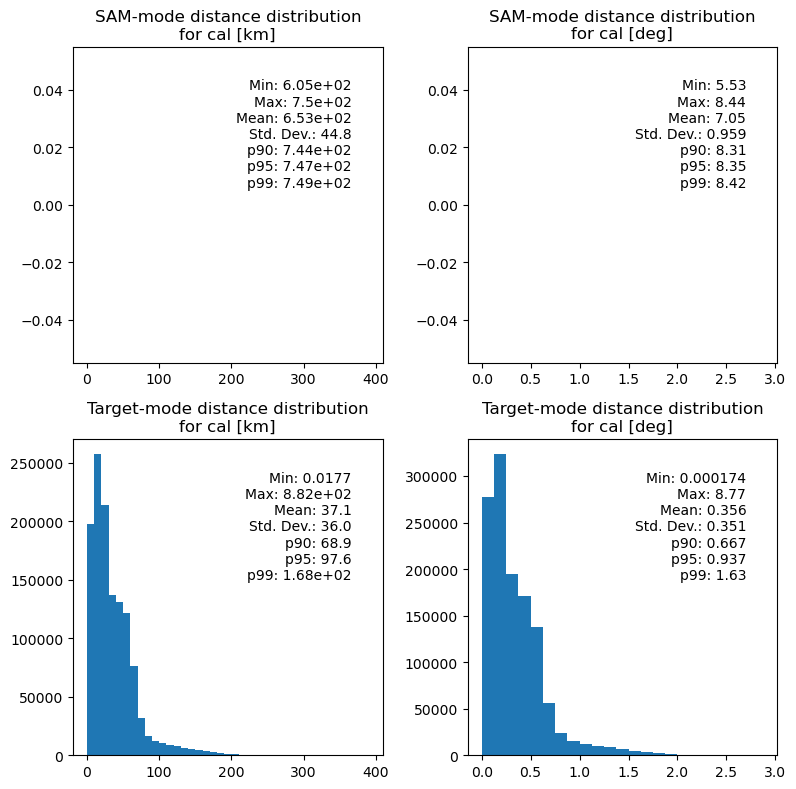

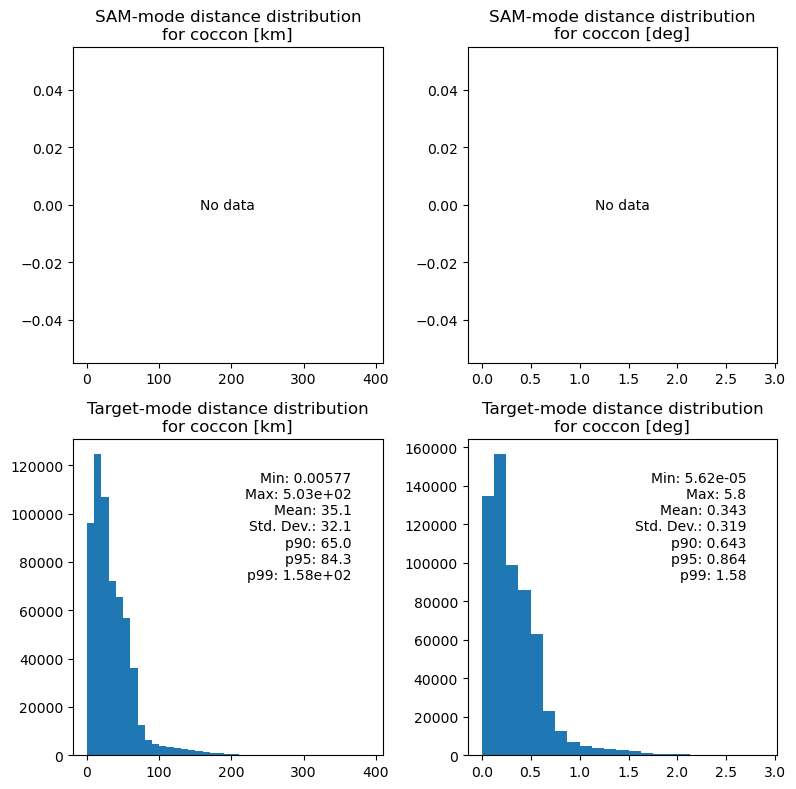

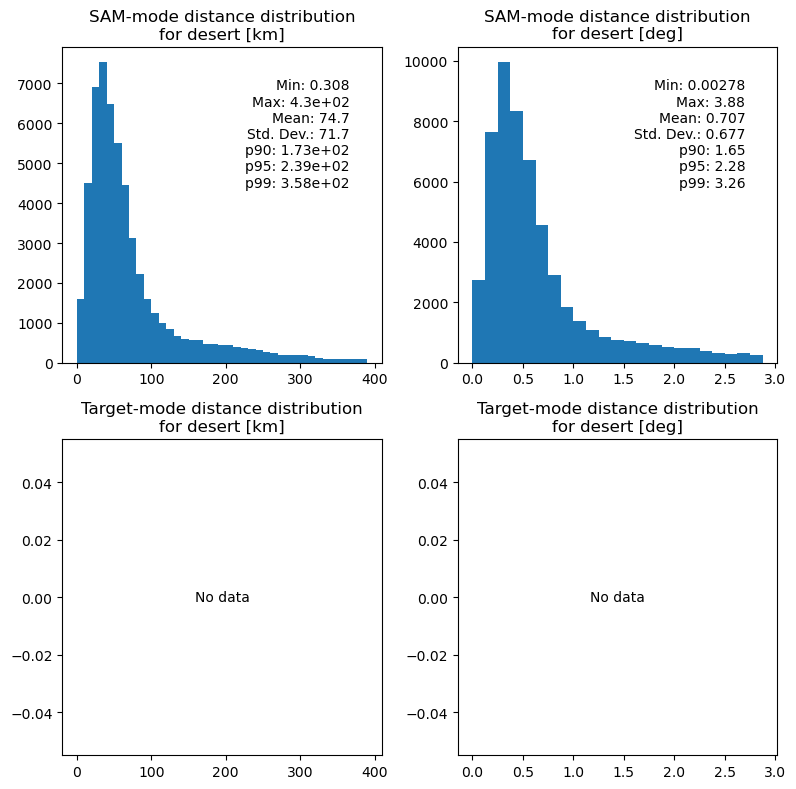

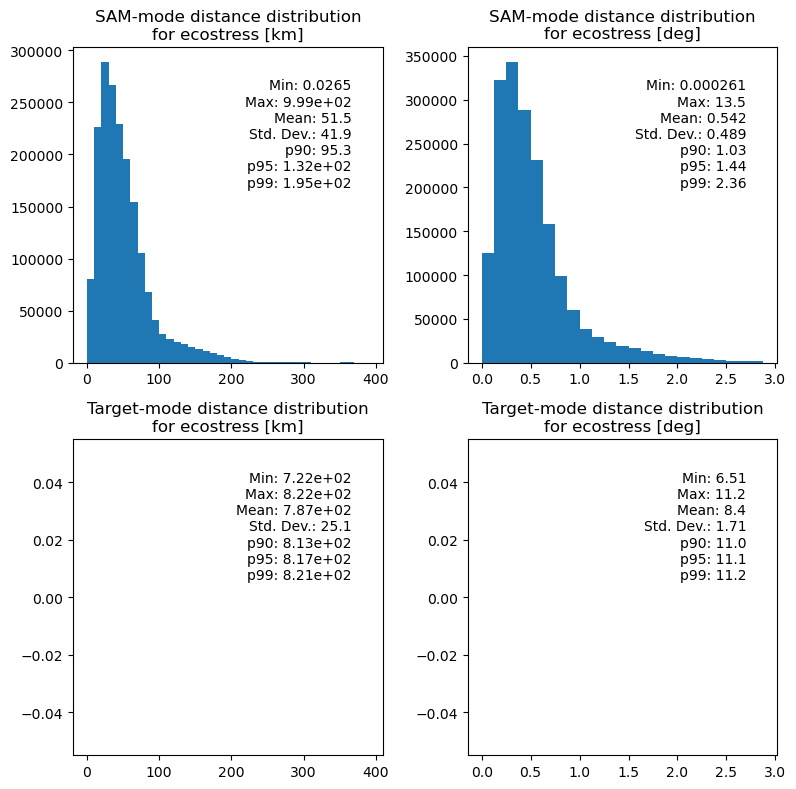

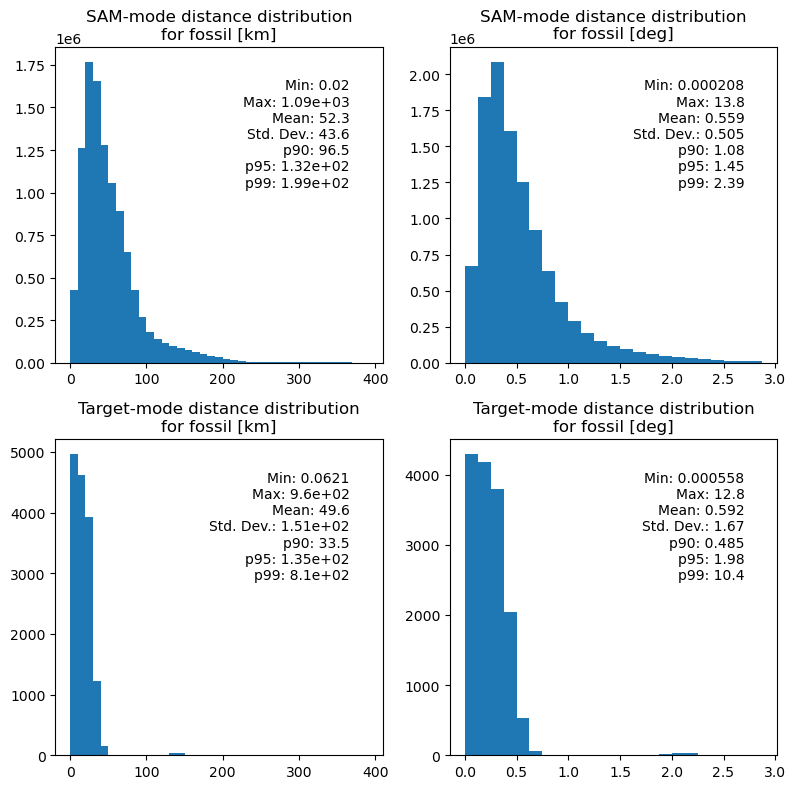

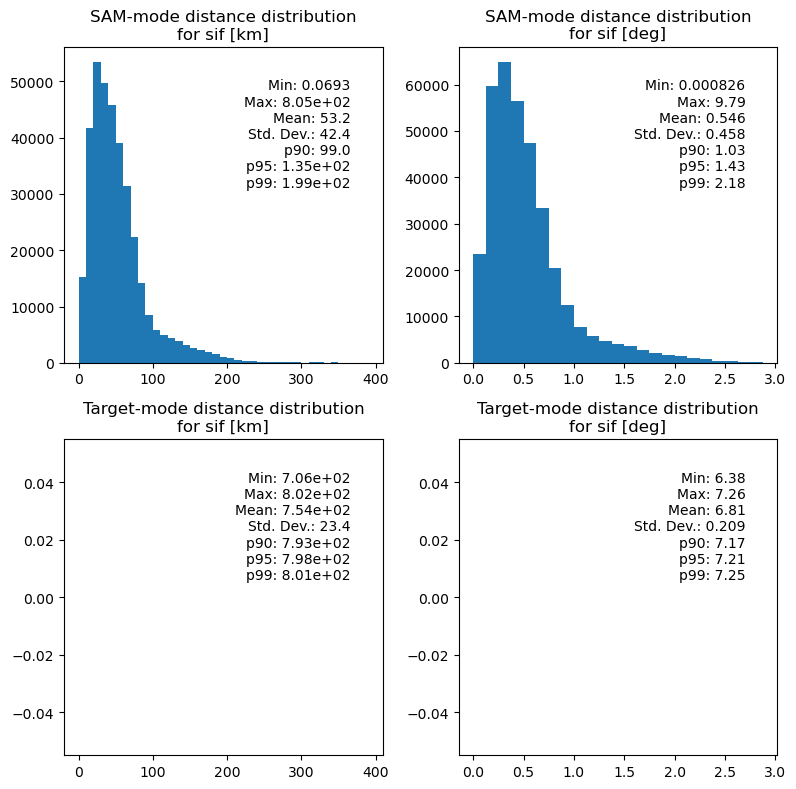

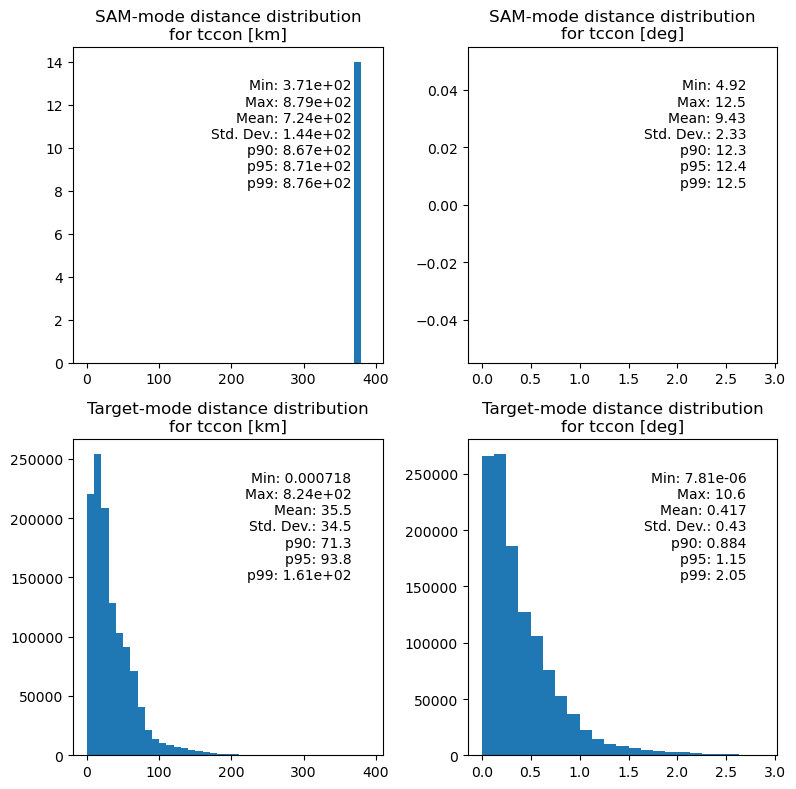

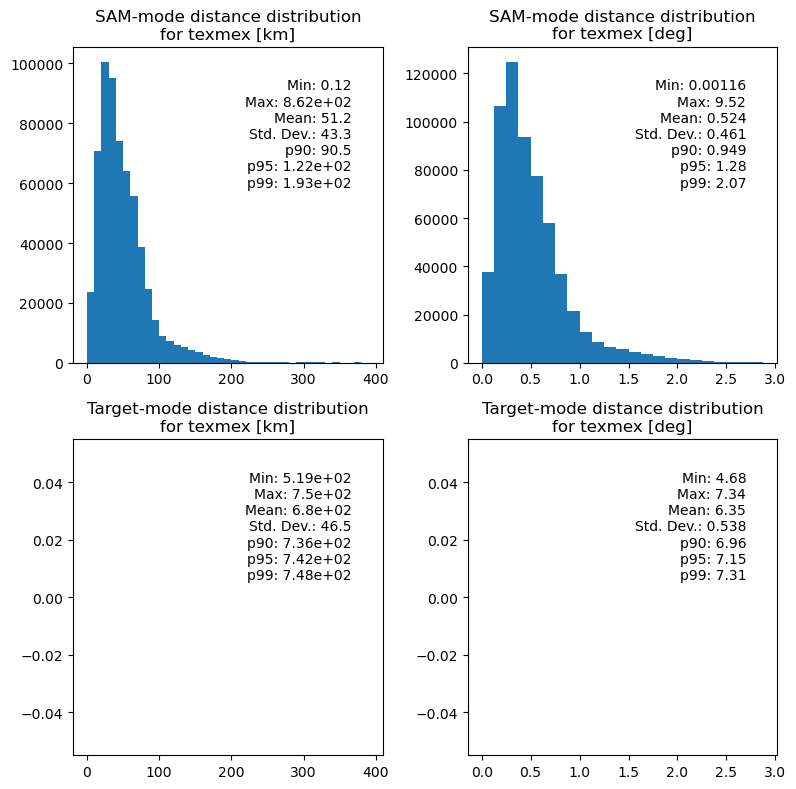

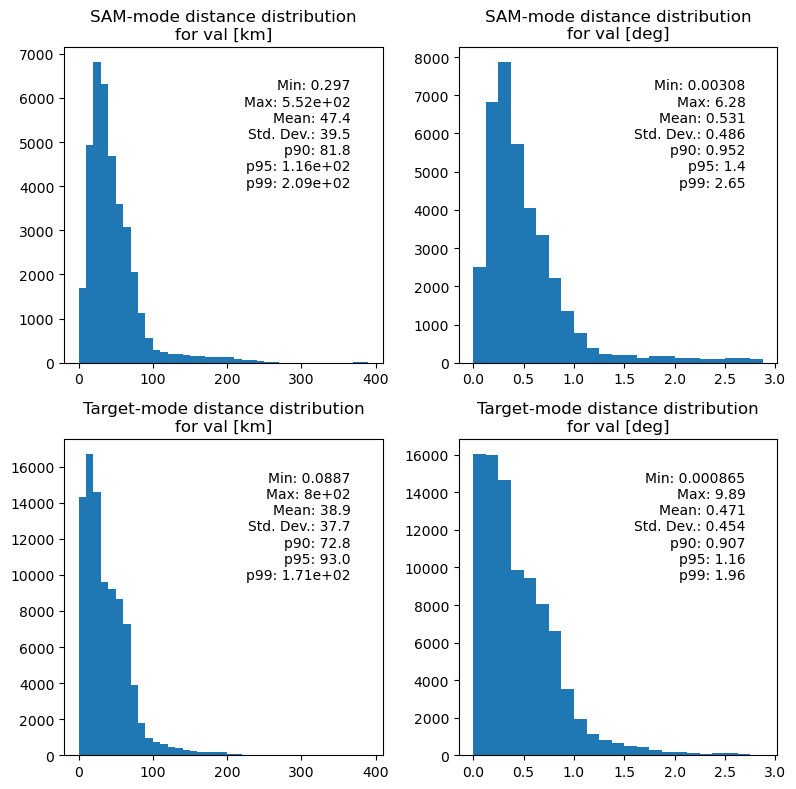

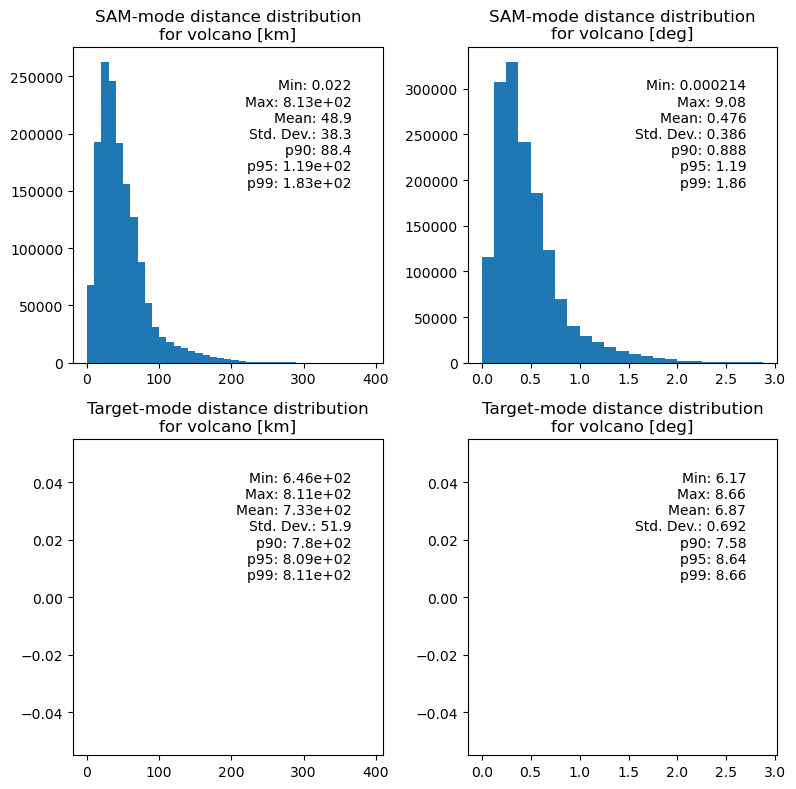

In [6]:
for ttp in sorted(type_stats.keys()):
    plot_stats(type_stats[ttp], ttp, True)

In [7]:
all_stats = dict(
    all=dict(
        sam_mode_km=np.hstack([stats[tid]['sam_mode_km'] for tid in stats]),
        sam_mode_deg=np.hstack([stats[tid]['sam_mode_deg'] for tid in stats]),
        target_mode_km=np.hstack([stats[tid]['target_mode_km'] for tid in stats]),
        target_mode_deg=np.hstack([stats[tid]['target_mode_deg'] for tid in stats])
    )
)

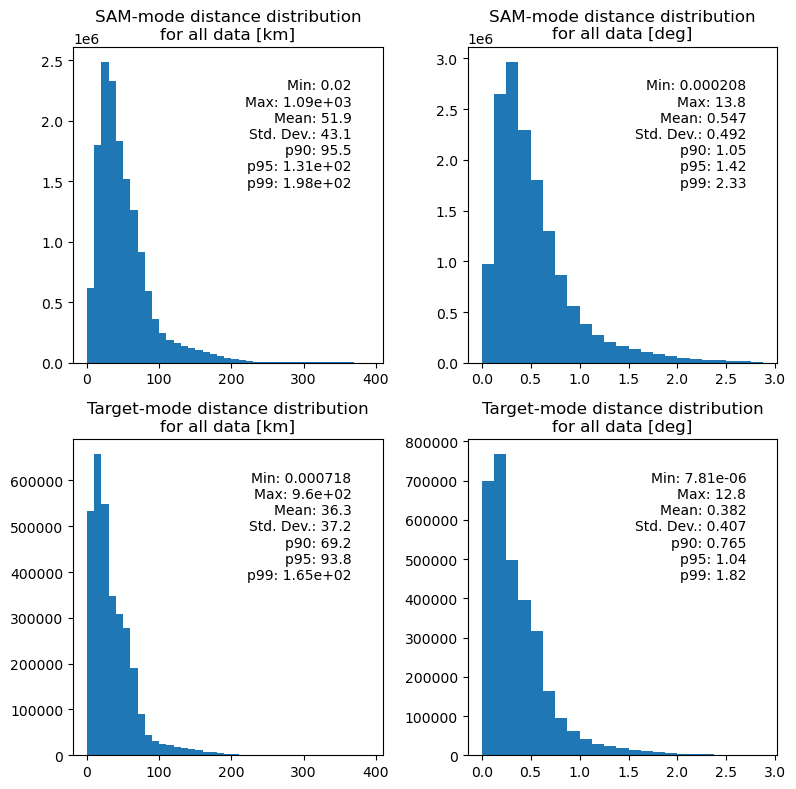

In [8]:
plot_stats(all_stats['all'], 'all data', True)